In [21]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import plotly.express as px

In [22]:
# Load the dataset
df = pd.read_csv('/content/Nuclear Incidents - Sheet3.csv')

In [26]:
df.dtypes

Location                       object
Incident                       object
Category                       object
Numbers of Direct Deaths      float64
Numbers of InDirect Deaths     object
INES\nlevel                   float64
Latitude                      float64
Longitude                     float64
dtype: object

In [27]:
df.rename(columns={"INES\nlevel": "INES LEVEL"},inplace = True)
df.head()

,Location,Incident,Category,Numbers of Direct Deaths,Numbers of InDirect Deaths,INES LEVEL,Latitude,Longitude
Date,,,,,,,,
1957-09-29,"Mayak, Kyshtym, Soviet Union",Kyshtym disaster,Storage/Handling,NaN,200,6.0,55.7131,60.8526
1957-10-10,"Sellafield, Cumberland, United Kingdom",Windscale fire,Operational/Safety Measures,0.0,240,5.0,54.4167,-3.4833
1961-01-03,"Idaho Falls, Idaho, United States",SL-1 prototype explosion,Operator Error,3.0,NaN,4.0,43.4920,-112.0401
1966-10-05,"Frenchtown Charter Township, Michigan, United ...",Fermi 1 Reactor meltdown,Technical Flaws,0.0,NaN,4.0,41.9562,-83.6639
1969-01-21,"Lucens reactor, Vaud, Switzerland","Loss-of-Coolant Accident (January 21, 1969)",Operator Error,0.0,NaN,4.0,46.6772,6.8750


In [31]:
print('Hover on dots to see more infromation about nuclear plant incidents and scroll towards left-right to see whole map')
fig = px.scatter_mapbox(data_frame=df,lat="Latitude", lon="Longitude", hover_name="Location ", hover_data=["Incident","INES LEVEL"],
                        color_discrete_sequence=["fuchsia"], zoom=1, height=700,title = 'Nuclear Plant Incidents')
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker=dict(size=10))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Hover on dots to see more infromation about nuclear plant incidents and scroll towards left-right to see whole map


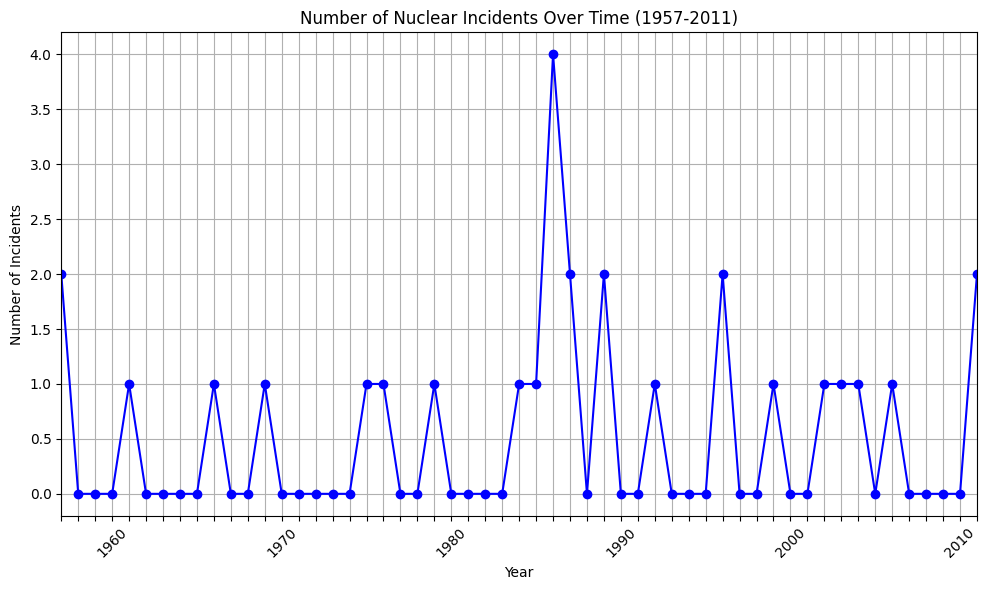

In [37]:
# Resample the data by year and count the number of incidents per year
incidents_per_year = df.resample('Y').size()

# Plotting the temporal analysis
plt.figure(figsize=(10, 6))
incidents_per_year.plot(kind='line', marker='o', color='blue')

plt.title('Number of Nuclear Incidents Over Time (1957-2011)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(incidents_per_year.index, rotation=45)
plt.tight_layout()

plt.show()

In [54]:
# Group incidents by Category and count the occurrences
category_counts = df['Category'].value_counts()

# Display the counts
print("Category-wise Incident Counts:")
print(category_counts)

Category-wise Incident Counts:
Operator Error                          3
Storage/Handling                        1
Inspection Findings                     1
Natural Disaster/Operational Failure    1
Safety Systems Failure                  1
Steam Explosion                         1
Corrosion Cleaning                      1
Corrosion                               1
Operational/Safety Procedures           1
Equipment Malfunction                   1
Valve Leak                              1
Equipment Rupture                       1
Cooling System Failure                  1
Malfunctions                            1
Operational/Safety Measures             1
Cooling Malfunctions                    1
Equipment Failure                       1
Experimental Operation                  1
Design/Safety Procedures                1
Equipment Problems                      1
Instrumentation Malfunction             1
Safety Violations/Design Problems       1
Operator/Technical Flaws                1
Ele

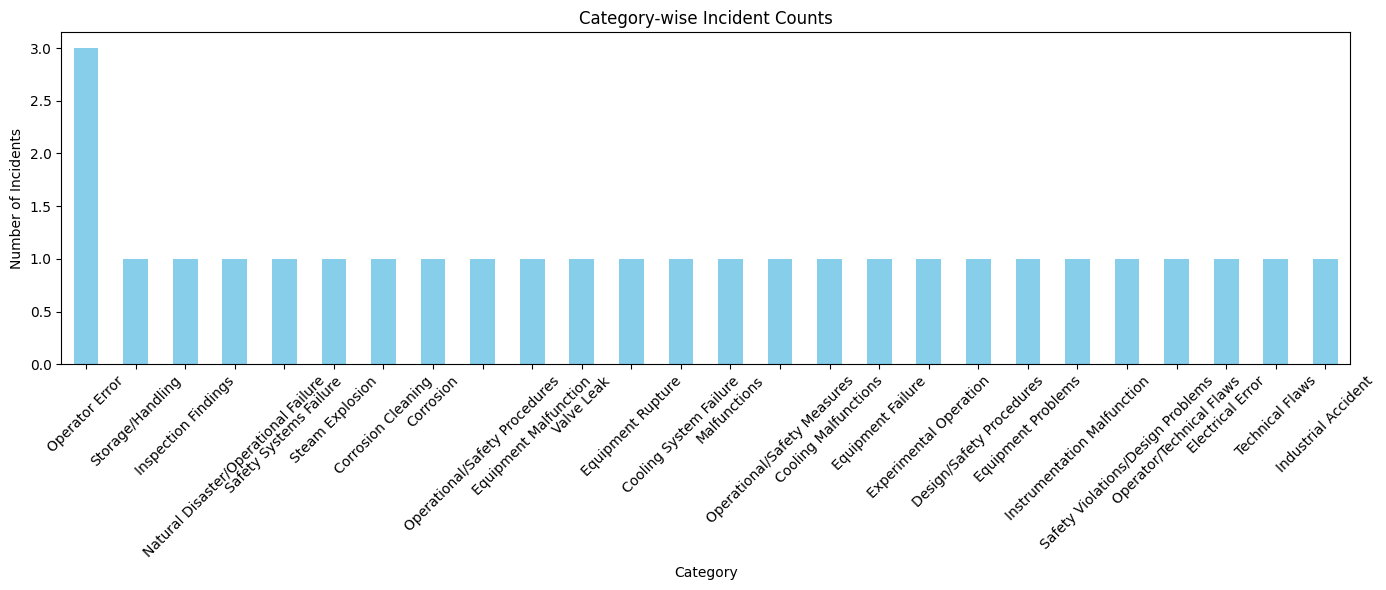

In [55]:
# Plotting the category-wise incident counts
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='skyblue')

plt.title('Category-wise Incident Counts')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [56]:
# Convert 'Numbers of Direct Deaths' and 'Numbers of InDirect Deaths' to numeric (some entries have commas)
df['Numbers of Direct Deaths'] = pd.to_numeric(df['Numbers of Direct Deaths'].replace(',', '', regex=True), errors='coerce')
df['Numbers of InDirect Deaths'] = pd.to_numeric(df['Numbers of InDirect Deaths'].replace(',', '', regex=True), errors='coerce')

# Group incidents by Category and sum the direct and indirect deaths
category_casualties = df.groupby('Category')[['Numbers of Direct Deaths', 'Numbers of InDirect Deaths']].sum()

# Display the total casualties per category
print("Casualties based on Incident Category:")
print(category_casualties)

Casualties based on Incident Category:
                                      Numbers of Direct Deaths  \
Category                                                         
Cooling Malfunctions                                       0.0   
Cooling System Failure                                     0.0   
Corrosion                                                  0.0   
Corrosion Cleaning                                         0.0   
Design/Safety Procedures                                  28.0   
Electrical Error                                           0.0   
Equipment Failure                                          4.0   
Equipment Malfunction                                      0.0   
Equipment Problems                                         0.0   
Equipment Rupture                                          0.0   
Experimental Operation                                     0.0   
Industrial Accident                                        1.0   
Inspection Findings                  

<Figure size 1400x800 with 0 Axes>

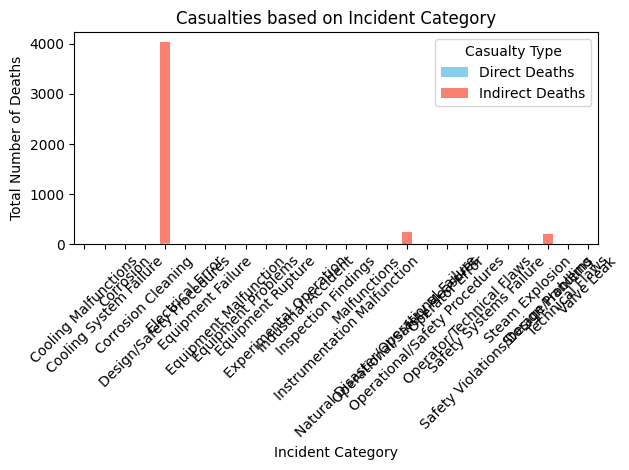

In [57]:
# Convert 'Numbers of Direct Deaths' and 'Numbers of InDirect Deaths' to numeric (some entries have commas)
df['Numbers of Direct Deaths'] = pd.to_numeric(df['Numbers of Direct Deaths'].replace(',', '', regex=True), errors='coerce')
df['Numbers of InDirect Deaths'] = pd.to_numeric(df['Numbers of InDirect Deaths'].replace(',', '', regex=True), errors='coerce')

# Group incidents by Category and sum the direct and indirect deaths
category_casualties = df.groupby('Category')[['Numbers of Direct Deaths', 'Numbers of InDirect Deaths']].sum()

# Plotting the casualties based on incident category
plt.figure(figsize=(14, 8))
category_casualties.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Casualties based on Incident Category')
plt.xlabel('Incident Category')
plt.ylabel('Total Number of Deaths')
plt.legend(title='Casualty Type', labels=['Direct Deaths', 'Indirect Deaths'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [58]:
print(df.columns)

Index(['Location ', 'Incident', 'Category', 'Numbers of Direct Deaths',
       'Numbers of InDirect Deaths', 'INES LEVEL', 'Latitude', 'Longitude'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

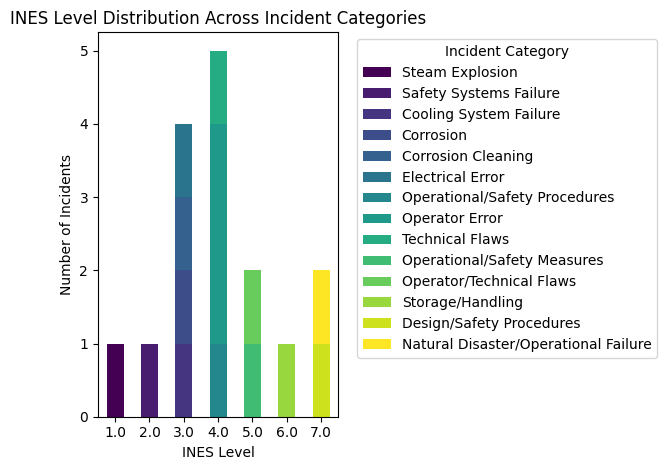

In [59]:
# Group incidents by INES level and Category, then count occurrences
ines_category_counts = df.groupby(['INES LEVEL', 'Category']).size().unstack(fill_value=0)

# Plotting INES level analysis
plt.figure(figsize=(10, 6))
ines_category_counts.plot(kind='bar', stacked=True, cmap='viridis')

plt.title('INES Level Distribution Across Incident Categories')
plt.xlabel('INES Level')
plt.ylabel('Number of Incidents')
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [60]:
# Convert casualty columns to numeric (some entries have commas)
df['Numbers of Direct Deaths'] = pd.to_numeric(df['Numbers of Direct Deaths'].replace(',', '', regex=True), errors='coerce')
df['Numbers of InDirect Deaths'] = pd.to_numeric(df['Numbers of InDirect Deaths'].replace(',', '', regex=True), errors='coerce')

# Select numerical columns for correlation analysis
numerical_columns = ['Numbers of Direct Deaths', 'Numbers of InDirect Deaths', 'INES LEVEL']

# Filter the dataframe for numerical columns
numerical_df = df[numerical_columns]

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            Numbers of Direct Deaths  \
Numbers of Direct Deaths                    1.000000   
Numbers of InDirect Deaths                  1.000000   
INES LEVEL                                  0.536533   

                            Numbers of InDirect Deaths  INES LEVEL  
Numbers of Direct Deaths                      1.000000    0.536533  
Numbers of InDirect Deaths                    1.000000    0.861407  
INES LEVEL                                    0.861407    1.000000  


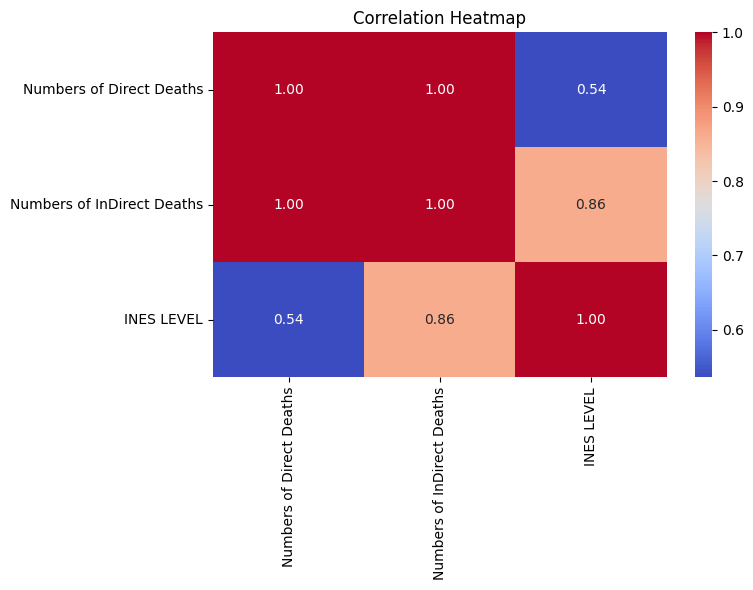

In [61]:
import seaborn as sns
# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()

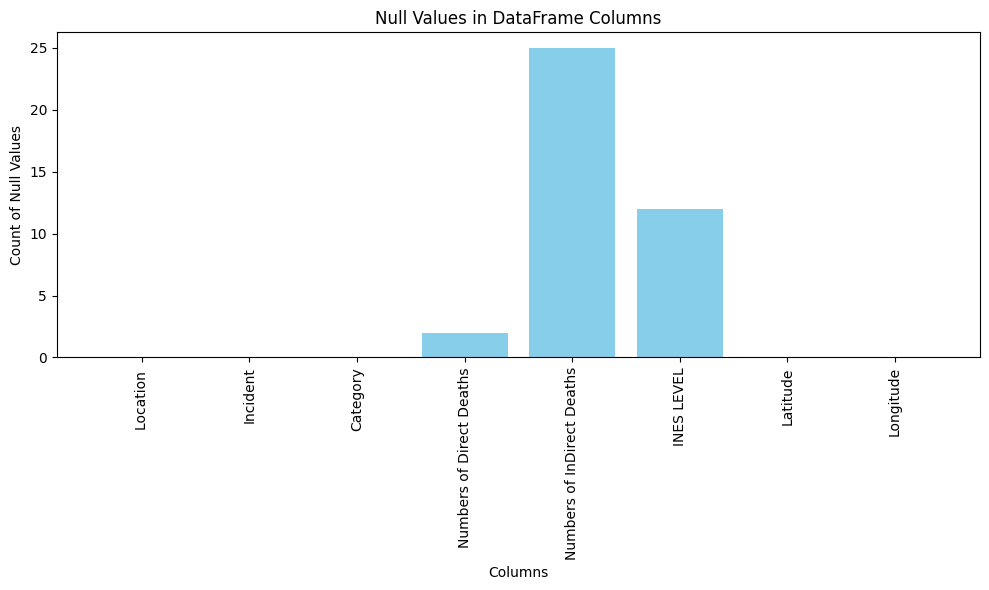

In [62]:
null_values = df.isnull()

# Calculate the sum of null values per column
null_count = null_values.sum()

# Plotting null values
plt.figure(figsize=(10, 6))
plt.bar(null_count.index, null_count.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Values in DataFrame Columns')
plt.tight_layout()
plt.show()

In [63]:
df.fillna(0, inplace=True)

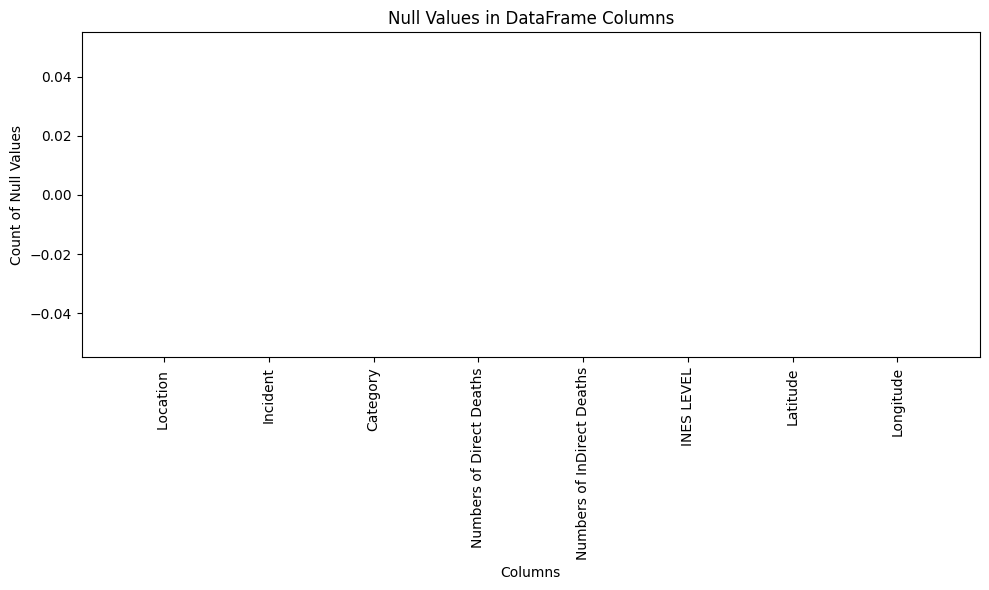

In [64]:
null_values = df.isnull()

# Calculate the sum of null values per column
null_count = null_values.sum()

# Plotting null values
plt.figure(figsize=(10, 6))
plt.bar(null_count.index, null_count.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Values in DataFrame Columns')
plt.tight_layout()
plt.show()

In [96]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X = df[['INES LEVEL', 'Category']]
y = df['Numbers of Direct Deaths']

X['Category'] = label_encoder.fit_transform(X['Category'])
print(X['Category'])
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a logistic regression model
logistic_regression = LogisticRegression(max_iter = 2000)

# Training the model
logistic_regression.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Other evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Date
1957-09-29    23
1957-10-10    16
1961-01-03    18
1966-10-05    24
1969-01-21    18
1975-12-07     5
1976-01-05    18
1979-03-28    19
1984-09-15    21
1985-03-09    13
1986-04-11     8
1986-04-26     4
1986-05-04    10
1986-12-09     6
1987-03-31     0
1987-12-19    14
1989-03-17    12
1989-10-19     1
1992-03-01     9
1996-02-20    25
1996-09-02     7
1999-09-30    17
2002-02-16     2
2003-04-10     3
2004-08-09    22
2006-07-25    20
2011-03-11    15
2011-09-12    11
Name: Category, dtype: int64
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         2.0       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6


Confusion Matrix:
[[5 0]
 [1 0]]


<ipython-input-96-cfccd9065476>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being se

In [85]:
from sklearn.metrics import classification_report

# Creating a logistic regression model
logistic_regression = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Training the model
logistic_regression.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluating the model without specifying zero_division in model initialization
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")




Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         2.0       1.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.92      0.50      0.45         6
weighted avg       0.86      0.83      0.76         6

Accuracy: 83.33


In [88]:
from sklearn.ensemble import RandomForestClassifier
# Creating a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
random_forest.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 83.33


<ipython-input-90-617b426009f6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Pearson Correlation Coefficients:
                            Numbers of Direct Deaths  \
Numbers of Direct Deaths                    1.000000   
Numbers of InDirect Deaths                  0.960249   
INES LEVEL                                  0.420312   
Latitude                                    0.097670   
Longitude                                   0.225240   

                            Numbers of InDirect Deaths  INES LEVEL  Latitude  \
Numbers of Direct Deaths                      0.960249    0.420312  0.097670   
Numbers of InDirect Deaths                    1.000000    0.412535  0.209746   
INES LEVEL                                    0.412535    1.000000  0.285400   
Latitude                                      0.209746    0.285400  1.000000   
Longitude                                     0.134740    0.438478  0.265074   

                            Longitude  
Numbers of Direct Deaths     0.225240  
Numbers of InDirect Deaths   0.134740  
INES LEVEL                  

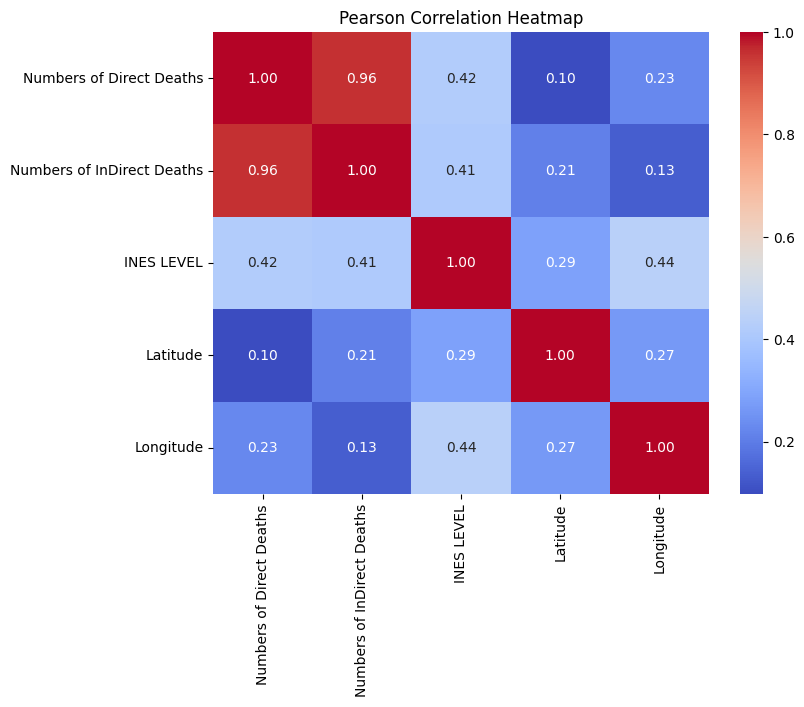

In [90]:
correlation_matrix = df.corr(method='pearson')

# Displaying correlation matrix
print("Pearson Correlation Coefficients:")
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [109]:
label_encoder = LabelEncoder()

X = df[['INES LEVEL', 'Category', 'Latitude' , 'Numbers of Direct Deaths']]
y = df['Numbers of InDirect Deaths']

X['Category'] = label_encoder.fit_transform(X['Category'])
print(X['Category'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
random_forest.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}")

<ipython-input-109-ae42982fa7d6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date
1957-09-29    23
1957-10-10    16
1961-01-03    18
1966-10-05    24
1969-01-21    18
1975-12-07     5
1976-01-05    18
1979-03-28    19
1984-09-15    21
1985-03-09    13
1986-04-11     8
1986-04-26     4
1986-05-04    10
1986-12-09     6
1987-03-31     0
1987-12-19    14
1989-03-17    12
1989-10-19     1
1992-03-01     9
1996-02-20    25
1996-09-02     7
1999-09-30    17
2002-02-16     2
2003-04-10     3
2004-08-09    22
2006-07-25    20
2011-03-11    15
2011-09-12    11
Name: Category, dtype: int64
Accuracy: 83.33


In [113]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Training the SVM classifier
svm.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svm.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.67


In [125]:
from sklearn import datasets
from sklearn.svm import SVC

label_encoder = LabelEncoder()

y = df['INES LEVEL']
X = df[['Numbers of Direct Deaths']]
# Generating a synthetic dataset for demonstration
X, y = datasets.make_classification(n_samples=100, random_state=42)

# Creating an SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Training the SVM classifier
svm.fit(X, y)

# Plotting the decision regions
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification')
plt.show()

ValueError: ignored

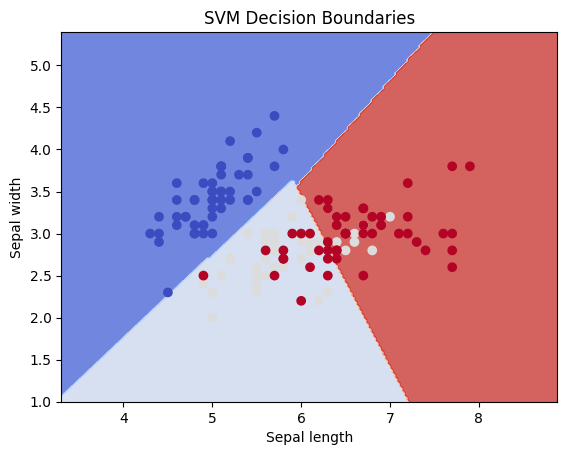

In [134]:
from sklearn import datasets
from sklearn import svm
# Load sample data (let's use the iris dataset for this example)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features
y = iris.target

# Create the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()

In [133]:
column_names = df.columns.tolist()
print("Columns:", column_names)

Columns: ['Location ', 'Incident', 'Category', 'Numbers of Direct Deaths', 'Numbers of InDirect Deaths', 'INES LEVEL', 'Latitude', 'Longitude']
